In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import os
data_dir = r"C:\Users\chhou\PycharmProjects\PythonProject3\emotions"

img_size = (48, 48)
batch_size = 32

# Dataset avec train/validation (80% / 20%)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# On recharge tout sans split
full_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    seed=456,
    image_size=img_size,
    batch_size=batch_size
)

dataset_size = len(full_dataset)
test_size = int(dataset_size * 0.15)

test_dataset = full_dataset.take(test_size)

print("Nb batches:", dataset_size)
print("Test batches:", test_size)


Found 49779 files belonging to 7 classes.
Using 39824 files for training.
Found 49779 files belonging to 7 classes.
Using 9955 files for validation.
Found 49779 files belonging to 7 classes.
Nb batches: 1556
Test batches: 233


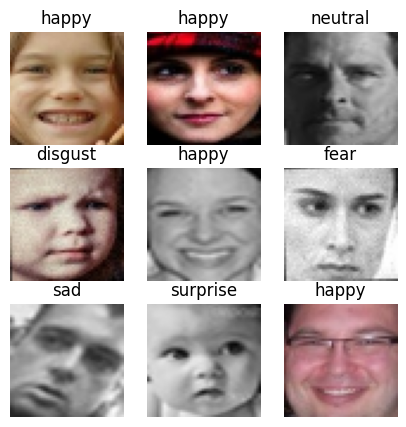

In [4]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
plt.figure(figsize=(5,5))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()


In [5]:
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])


In [6]:
modelCNN.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [13]:
modelCNN.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset
)


Epoch 1/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.9440 - loss: 0.1587 - val_accuracy: 0.5995 - val_loss: 3.2141
Epoch 2/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - accuracy: 0.9483 - loss: 0.1502 - val_accuracy: 0.5831 - val_loss: 3.3904
Epoch 3/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.9485 - loss: 0.1490 - val_accuracy: 0.5953 - val_loss: 3.3509
Epoch 4/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.9495 - loss: 0.1426 - val_accuracy: 0.5968 - val_loss: 3.4979
Epoch 5/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - accuracy: 0.9542 - loss: 0.1303 - val_accuracy: 0.5912 - val_loss: 3.5988
Epoch 6/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.9493 - loss: 0.1456 - val_accuracy: 0.5880 - val_loss: 3.4582
Epoch 7/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.9504 - loss: 0.1397 - val_accuracy: 0.5865 - val_loss: 3.5571
Epoch 8/30
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.9559 -

In [14]:
modelCNN.evaluate(test_dataset, verbose=2)


233/233 - 4s - 17ms/step - accuracy: 0.8479 - loss: 1.1501


[1.1501270532608032, 0.8479077219963074]

In [15]:
for images, labels in test_dataset.take(1):
    prediction = modelCNN.predict(images)
    predicted_classes = np.argmax(prediction, axis=1)

    for i in range(len(images)):
        print(f"Vrai: {class_names[labels[i]]}, "
              f"Prédit: {class_names[predicted_classes[i]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Vrai: neutral, Prédit: neutral
Vrai: sad, Prédit: sad
Vrai: surprise, Prédit: surprise
Vrai: sad, Prédit: angry
Vrai: happy, Prédit: happy
Vrai: sad, Prédit: sad
Vrai: sad, Prédit: happy
Vrai: neutral, Prédit: neutral
Vrai: neutral, Prédit: neutral
Vrai: happy, Prédit: happy
Vrai: sad, Prédit: sad
Vrai: sad, Prédit: sad
Vrai: sad, Prédit: sad
Vrai: happy, Prédit: sad
Vrai: neutral, Prédit: neutral
Vrai: happy, Prédit: happy
Vrai: happy, Prédit: happy
Vrai: happy, Prédit: happy
Vrai: fear, Prédit: fear
Vrai: happy, Prédit: happy
Vrai: happy, Prédit: happy
Vrai: happy, Prédit: happy
Vrai: angry, Prédit: angry
Vrai: sad, Prédit: sad
Vrai: happy, Prédit: happy
Vrai: happy, Prédit: happy
Vrai: angry, Prédit: happy
Vrai: disgust, Prédit: disgust
Vrai: angry, Prédit: angry
Vrai: sad, Prédit: sad
Vrai: fear, Prédit: fear
Vrai: happy, Prédit: happy
